In [ ]:
%matplotlib inline


In [11]:
import pathlib
import json
import numpy as np
import matplotlib.pyplot as plt

def flatten_metrics(metrics):
    flattened = {}
    flattened["CoLA"] = metrics['CoLA']['mcc']
    flattened["MNLI-mm"] = metrics["MNLI"]["mnli-mm_acc"]
    flattened["MNLI"] = metrics["MNLI"]["mnli_acc"]
    flattened["MRPC"] = metrics["MRPC"]["f1"]
    flattened["QNLI"] = metrics["QNLI"]["acc"]
    flattened["QQP"] = metrics["QQP"]["acc"]
    flattened["RTE"] = metrics["RTE"]["acc"]
    flattened["SST-2"] = metrics["SST-2"]["acc"]
    flattened["STS-B"] = metrics["STS-B"]["corr"]
    flattened["WNLI"] = metrics["WNLI"]["acc"]
    return flattened

def plot_metrics(experiment_metrics, task):
    experiments = [e_m[0] for e_m in experiment_metrics]
    metrics_data = [e_m[1] for e_m in experiment_metrics]
    x_pos = np.arange(len(experiments))
    means = [m[task][0] for m in metrics_data]
    errors = [m[task][1] for m in metrics_data]
    fig, ax = plt.subplots()
    ax.bar(x_pos, means, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_ylabel('Benchmark')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(experiments)
    ax.set_title(task)
    ax.yaxis.grid(True)

    # Save the figure and show
    plt.tight_layout()
    plt.show()

In [12]:
experiments_path = pathlib.Path("../experiments")

In [13]:
baseline_path = experiments_path / "baseline" / "results.json"
random_embeddings_path = experiments_path / "randomize_embeddings" / "results.json"


In [26]:

all_metrics = []
with baseline_path.open() as f:
    metrics = json.load(f)
    all_metrics.append(("baseline", metrics))

with random_embeddings_path.open() as f:
    metrics = json.load(f)
    all_metrics.append(("random_embeddings", metrics))

#randomize_qkv_path = experiments_path / "randomize_qkv"

# for path in sorted(randomize_qkv_path.glob("*.json"), key=lambda p: -1 if p.stem.split("_")[2] == "all" else int(p.stem.split("_")[2])):
#     with path.open() as f:
#         metrics = json.load(f)
#         splited = path.stem.split("_")
#         if "value" == splited[0]:
#             all_metrics.append((str(splited[2]), metrics))
revert_embeddings  = experiments_path / "revert_embeddings" / "revert_embeddings_results.json"

with revert_embeddings.open() as f:
    metrics = json.load(f)
    all_metrics.append(("revert_embeddings", metrics))

revert_qkv = experiments_path / "revert_qkv"
for path in sorted(revert_qkv.glob("*.json")):
    with path.open() as f:
        metrics = json.load(f)
        splited = path.stem.split("_")
        all_metrics.append((str(splited[0]), metrics))


In [27]:

flattened_metrics = [(name, flatten_metrics(metrics)) for name, metrics in all_metrics]



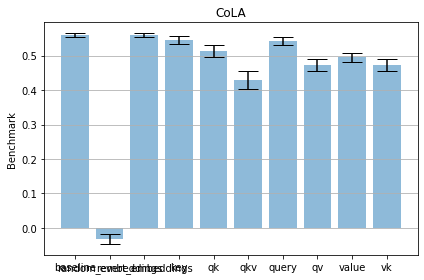

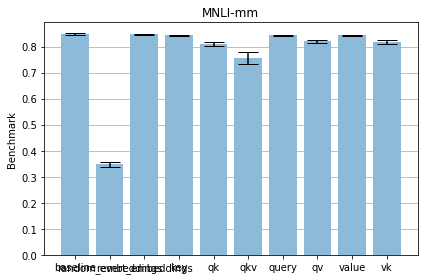

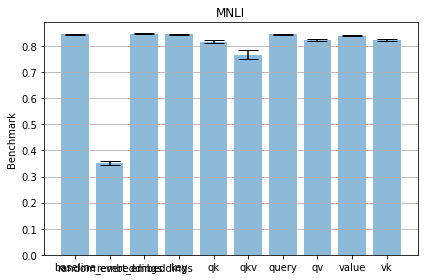

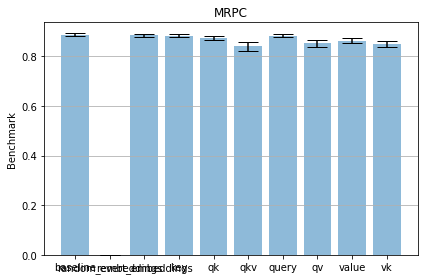

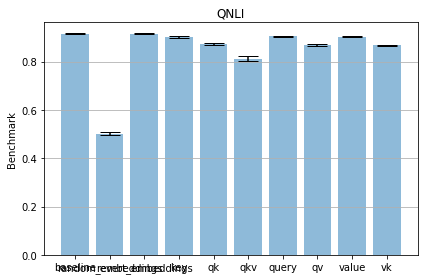

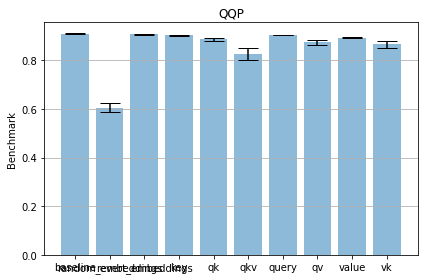

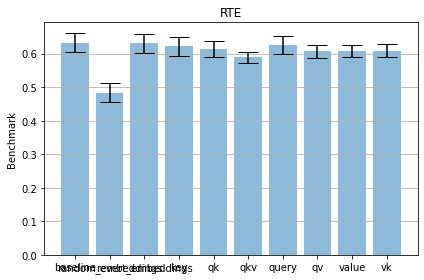

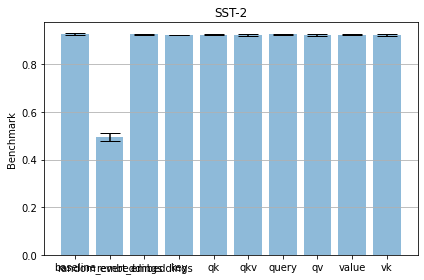

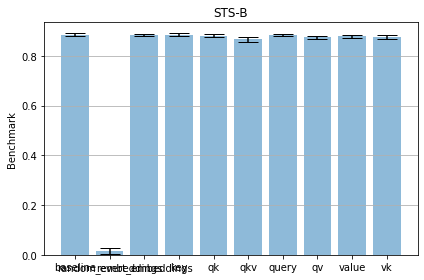

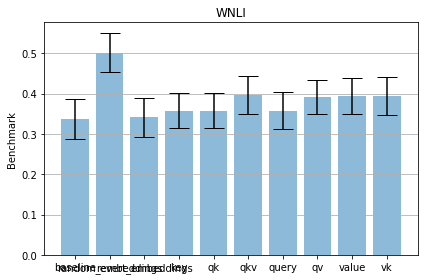

In [28]:
import time
for name in flattened_metrics[0][1].keys():
    plot_metrics(flattened_metrics, name)
    time.sleep(0.1)